In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('C:/Users/34670/Desktop/python/densidad_poblacion/proyecto/data/population-density.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76680 entries, 0 to 76679
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              76680 non-null  object 
 1   Code                72962 non-null  object 
 2   Year                76680 non-null  int64  
 3   Population density  76680 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [3]:
df_continentes = df[df['Code'].isna()]
df = df.dropna(subset=['Code'])

In [5]:
df_continentes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3718 entries, 338 to 73020
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              3718 non-null   object 
 1   Code                0 non-null      object 
 2   Year                3718 non-null   int64  
 3   Population density  3718 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 145.2+ KB


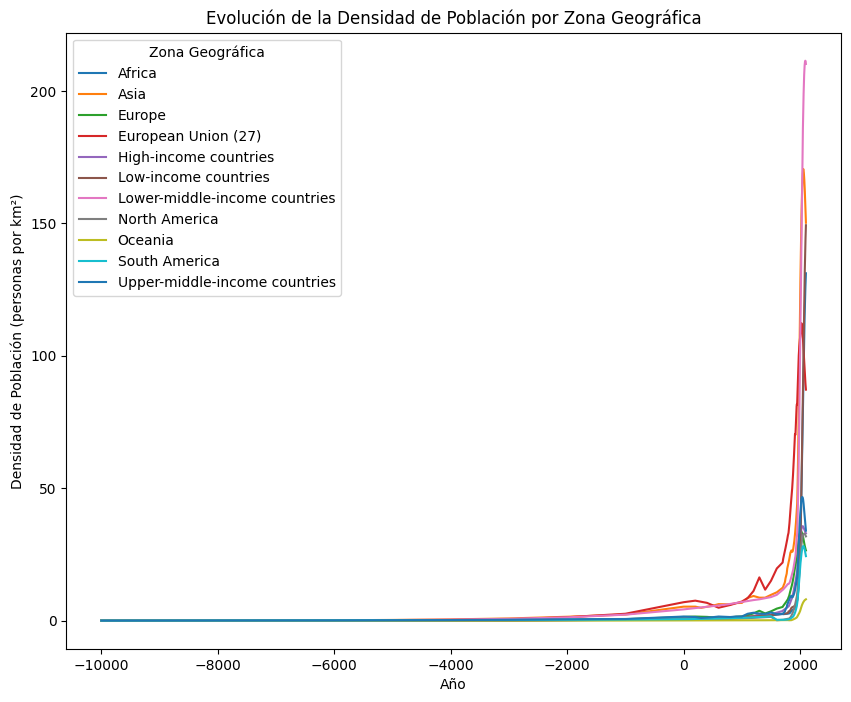

In [7]:
# Agrupar por 'Entity' y 'Year' y luego desagregar, suponiendo que quieres la media de la densidad si hay datos repetidos
grouped = df_continentes.groupby(['Entity', 'Year'])['Population density'].mean().unstack(0)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 8))

# Dibujar las líneas para cada 'Entity'
grouped.plot(ax=ax)

# Títulos y etiquetas
ax.set_title('Evolución de la Densidad de Población por Zona Geográfica')
ax.set_xlabel('Año')
ax.set_ylabel('Densidad de Población (personas por km²)')

# Mostrar la leyenda y la gráfica
ax.legend(title='Zona Geográfica')
plt.show()

In [9]:
fig = px.line(df_continentes, x='Year', y='Population density', color='Entity', 
              title='Evolución de la Densidad de Población por Zona Geográfica',
              labels={'Population density': 'Densidad de Población (personas por km²)', 'Year': 'Año'})

# Mostrar la gráfica
fig.show()

C:\Users\34670\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])
